![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [ ]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
0      8728
21     8701
22     8531
13     8474
10     8440
8      7523
23     7419
9      7092
1      5836
6      5621
7      5403
2      4726
3      3943
4      3238
5      3171
Name: HOUR OCC, dtype: int64


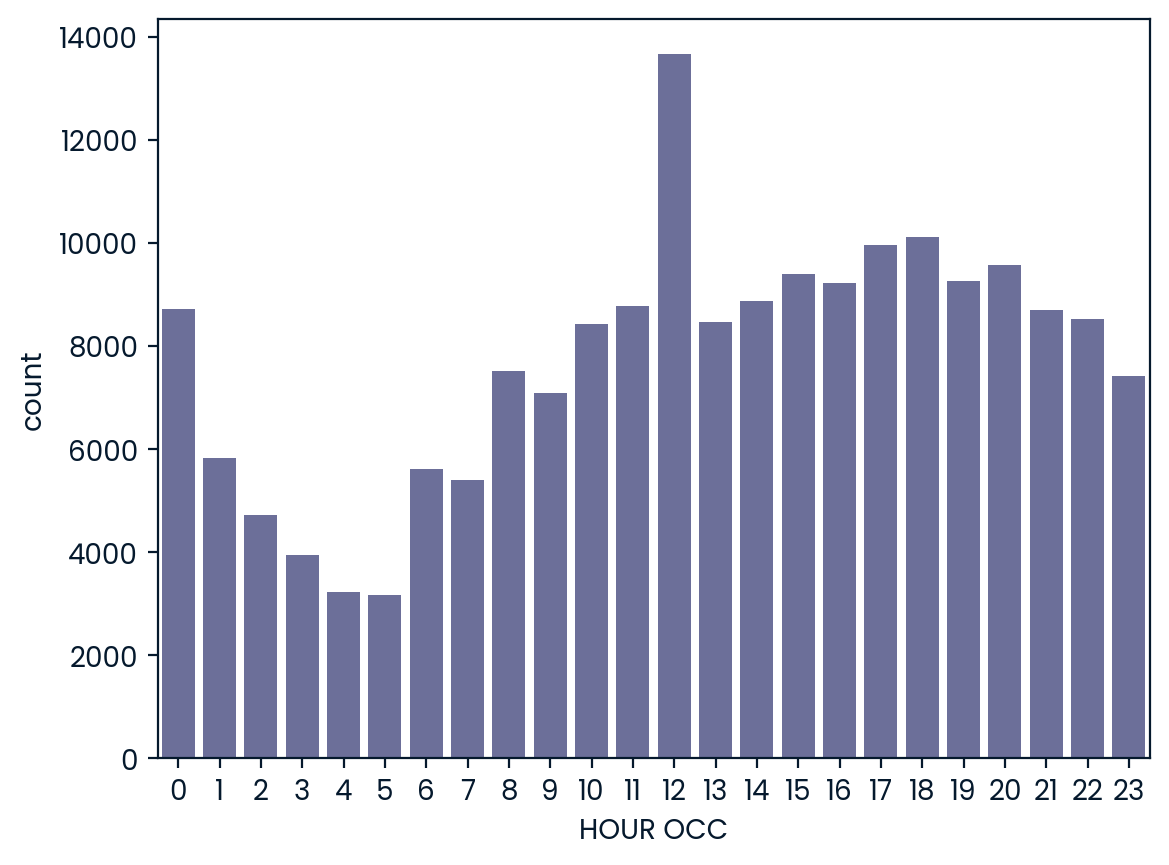

In [31]:
#hour has the highest frequency of crimes

# Extract the hour from the 'TIME OCC' column (first 2 digits) and convert it to an integer
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Print the frequency of each hour (how many crimes occurred at each hour)
print(crimes["HOUR OCC"].value_counts())

# Create a count plot (bar plot) to visually show the distribution of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12


      AREA NAME  HOUR OCC
1       Central      3312
6     Hollywood      2699
0   77th Street      2558
15    Southwest      2347
14    Southeast      2218
9        Newton      2142
11      Olympic      2137
12      Pacific      1916
13      Rampart      1860
8   N Hollywood      1855
20     Wilshire      1716
10    Northeast      1684
17     Van Nuys      1629
19  West Valley      1520
16      Topanga      1461
7       Mission      1453
4        Harbor      1384
18      West LA      1369
2    Devonshire      1348
5    Hollenbeck      1315
3      Foothill      1260


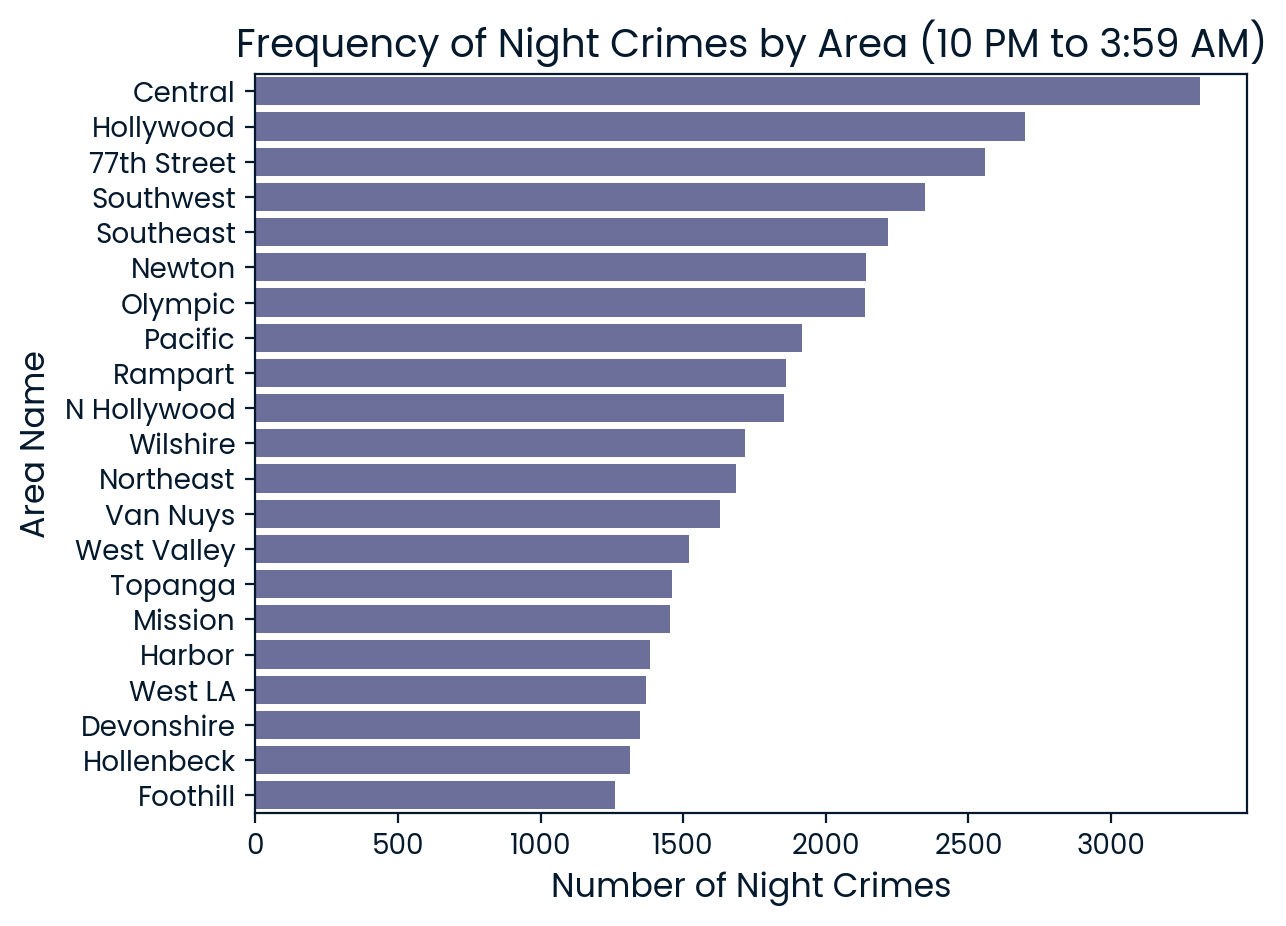

In [33]:
#area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)

# This includes hours 22 (10 PM), 23 (11 PM), 0 (12 AM), 1 AM, 2 AM, and 3 AM
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group the filtered dataset by 'AREA NAME' and count the number of crimes ('HOUR OCC') in each area
peak_night_crime_location = night_time.groupby("AREA NAME",as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",ascending=False)

# Print the sorted DataFrame to display which area has the largest frequency of night crimes
print(peak_night_crime_location)

# Create a bar plot for the areas with the highest frequency of night crimes
sns.barplot(data=peak_night_crime_location, x="HOUR OCC", y="AREA NAME")
plt.title('Frequency of Night Crimes by Area (10 PM to 3:59 AM)', fontsize=14)
plt.xlabel('Number of Night Crimes', fontsize=12)
plt.ylabel('Area Name', fontsize=12)
plt.show()

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64


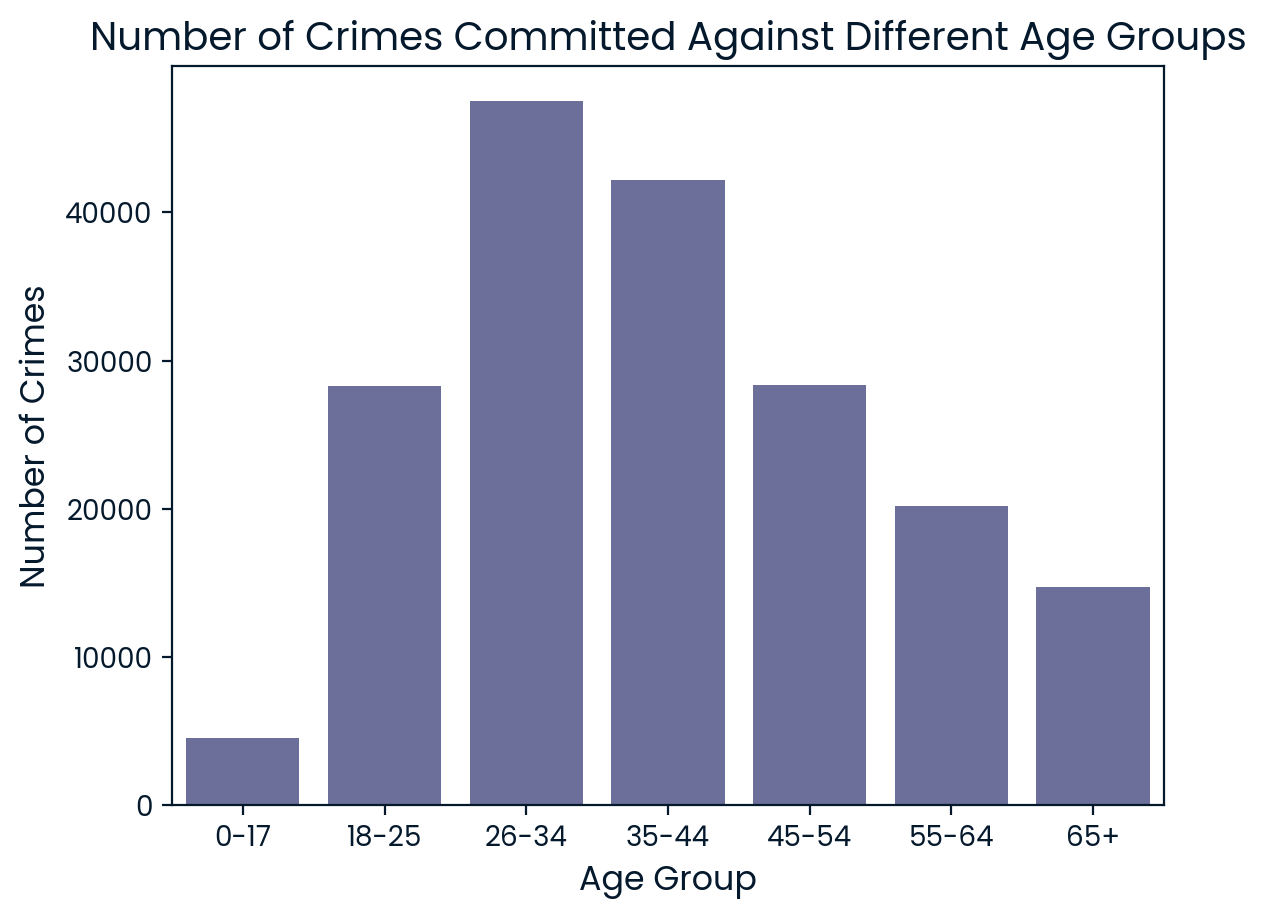

In [34]:
# Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

# Define the age group bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, 120]  # The last bin is for ages 65+
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Cut the 'Vict Age' column into the defined age groups
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

# Count the number of crimes for each age group
victim_ages = crimes['Age Group'].value_counts().sort_index()

# Display the result
print(victim_ages)

# Create a bar plot
sns.barplot(x=victim_ages.index, y=victim_ages.values)
plt.title('Number of Crimes Committed Against Different Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.show()